In [181]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output


In [183]:
theta = 90
theta = np.radians(90)
x = 10 * np.cos(theta)
y = 10 * np.sin(theta)


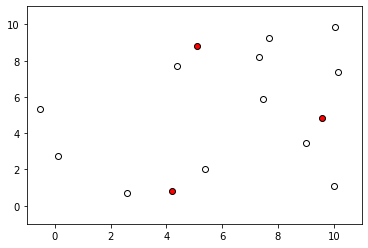

In [254]:
# Initial conditions
xmin = 0
xmax = 10
ymin = 0
ymax = 10
N = 15

x = np.random.uniform(xmin,xmax,N)
y = np.random.uniform(ymin,ymax,N)

recovered = np.zeros(N, dtype=bool)
infected = np.zeros(N, dtype=bool)
quanretine_time = np.zeros(N)
infected[0] = True
theta = np.radians(np.random.uniform(0,360,N))

for k in range(100):
   
    x = np.round(x + 0.1 * np.cos(theta),2)
    y = np.round(y + 0.1 * np.sin(theta),2)
    
    E = edist(x,y)
    rows,cols = np.where((E > 0) & (E < 0.1))
    idx_collisions = np.zeros(N, dtype="bool")
    idx_collisions[rows] = True
    
    idx_x = (x <= xmin) | (x >= xmax)
    idx_y = (y <= ymin) | (y >= ymax)
    idx_bnd = idx_x | idx_y
    idx = idx_bnd | idx_collisions
    
    idx_infected = idx_collisions & infected
    infected[rows] = True
    theta[idx] = np.random.uniform(0,360,np.sum(idx))

    
    #time.sleep(0.1)
    clear_output(wait=True)
    plt.scatter(x[~infected],y[~infected],marker='o',facecolor='w',edgecolor='k')
    plt.scatter(x[infected],y[infected],marker='o',facecolor='r',edgecolor='k')

    plt.xlim(xmin-1,xmax+1)
    plt.ylim(ymin-1,ymax+1)
    plt.show()
    

In [250]:
edist(x,y)

array([[0.        , 2.14965113, 3.67642489, 7.45682238, 7.88124356],
       [2.14965113, 0.        , 1.69673215, 6.77362532, 5.75675256],
       [3.67642489, 1.69673215, 0.        , 7.63141533, 4.70507173],
       [7.45682238, 6.77362532, 7.63141533, 0.        , 7.20273559],
       [7.88124356, 5.75675256, 4.70507173, 7.20273559, 0.        ]])

In [242]:
# Define function to compute euclidean distance
def edist(x,y):
    df = np.kron(np.ones(N),[x,y]) - np.kron([x,y],np.ones(N)) # Compute differences in each dimension using Kronecker product.
    E = np.sqrt(df[0]**2 + df[1]**2) # Compute Euclidean distance.
    E = np.reshape(E,[N,N])
    return E


In [236]:
df = np.kron(np.ones(N),[x,y]) - np.kron([x,y],np.ones(N)) # Compute differences in each dimension using Kronecker product.
E = np.sqrt(df[0]**2 + df[1]**2) # Compute Euclidean distance.
E

array([0.        , 4.80485171, 0.48507731, 2.73344105, 3.68663803,
       4.80485171, 0.        , 4.88185416, 3.87537095, 6.04933881,
       0.48507731, 4.88185416, 0.        , 3.16291005, 4.16924454,
       2.73344105, 3.87537095, 3.16291005, 0.        , 2.18764714,
       3.68663803, 6.04933881, 4.16924454, 2.18764714, 0.        ])

In [237]:
E = np.reshape(E,[N,N])
E

array([[0.        , 4.80485171, 0.48507731, 2.73344105, 3.68663803],
       [4.80485171, 0.        , 4.88185416, 3.87537095, 6.04933881],
       [0.48507731, 4.88185416, 0.        , 3.16291005, 4.16924454],
       [2.73344105, 3.87537095, 3.16291005, 0.        , 2.18764714],
       [3.68663803, 6.04933881, 4.16924454, 2.18764714, 0.        ]])

In [239]:
idx = (E > 0) & (E < 1)
idx

array([[False, False,  True, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [240]:
rows,cols = np.where((E > 0) & (E < 2))
print(rows)
print(cols)

[0 2]
[2 0]


In [217]:
print(x)
print(y)

[5.91 7.12 5.43 8.45 9.48]
[1.45 6.1  1.52 2.46 0.53]


In [244]:
cols

array([2, 0])